# QR-code App
<b>Objective:</b> Web or GUI-based QR-Code generator.<br>
<br>
<b>Requirements:</b><br>
- Generate at least 3 kinds of QR-Codes (e.g. web-link, WiFi configuration, VCard,
- ICS appointment)
- Form for data input
- Save form data to valid file
- Load form data from valid file
- The generated QR-Code can be saved or downloaded

## Contents:
Prototyping:
1. create Qr-code
- save Qr-code in png and svg (maybe)
- read Qr-code
- form for data input
- save data to valid file
- load data from valid file
- download Qr-code <br>

Implementation: 
- unit testing/integration

<b>All dependencies:</b>
- pip: qrcode (creating Qr-code)
- brew: zbar  (reading bar codes)
- pip: pyzbar (reading bar codes python impl)
- pip: pypng  (bindings between zbar and pillow) 
- pip: Pillow (processing and creating images)
- pip: vobject(creating and parsing VCards)

1: <b>create Qr-code:</b>

In [1]:
import qrcode

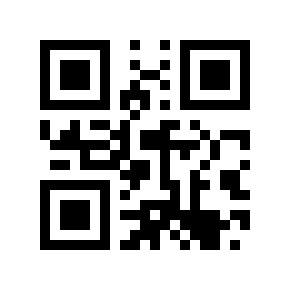

In [9]:
# simple create:
def createQrSimple(data: str) -> qrcode.image.pil.PilImage:
    import qrcode
    return qrcode.make(data)

img = qrcode.make('Some data here')
img

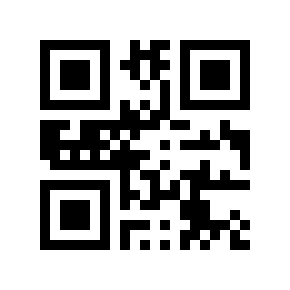

In [27]:
# advanced create:
qr = qrcode.QRCode(
    # Note: version number changes automatically to allow more data
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data('Some dato')
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img

2: <b>save Qr-code in png:

In [40]:
# save Qr-code image as png:
img.save("./data/qr-code.png", "png")

3: <b>read Qr-code:</b><br>

In [23]:
from PIL import Image
from pyzbar.pyzbar import decode
data = decode(Image.open("./data/qr-code.png"))
print(data)
print(data[0][0])

[Decoded(data=b'Some data', type='QRCODE', rect=Rect(left=40, top=40, width=210, height=210), polygon=[Point(x=40, y=40), Point(x=40, y=250), Point(x=250, y=250), Point(x=250, y=40)])]
b'Some data'


4: <b>form for data input</b>
<br>see https://github.com/zxing/zxing/wiki/Barcode-Contents#wifi-network-config-android for data formats
<br>Data forms:
- web link
- WiFi configuration
- VCard

In [13]:
# web link:
print("Enter web link:")
web_link = input()

Enter web link:



In [28]:
# WiFi configuration:
# format: WIFI:T:WPA;S:mynetwork;P:mypass;;
# T = authentication type (example WPA)
# S = network SSID
# P = password key
# H = true if network SSID is hidden (optional)

print("Enter SSID:")
ssid = 'S:' + input()

get_auth_type = {
    'wpa': 'WPA',
    'wep': 'WEP',
    'none': 'nopass'
}
print("Enter encryption type ('WPA', 'WEP' or 'none' if there is no password):")
auth_type = 'T:' + get_auth_type[input().lower()]

if 'nopass' not in auth_type:
    print("Enter password:")
    key = 'P:' + input() 
else:
    key = ''

print("Is network hidden? (y/n)")
if (input() == 'y'):
    hidden = 'H:true'
else:
    hidden = ''


wifi_config = 'WIFI:' + auth_type + ';' + ssid + ';' + key + ';' + hidden + ';'
wifi_config

Enter SSID:
sdf
Enter encryption type ('WPA', 'WEP' or 'none' if there is no password):
none
Is network hidden? (y/n)
y


'WIFI:T:nopass;S:sdf;;H:true;'

In [54]:
#VCard:
import vobject
# vobject documentation: http://eventable.github.io/vobject/
v = vobject.vCard()

print("Enter full name:")
v.add('fn').value = input()
if ' ' in v.fn.value:
    print(v.fn.value)

Enter full name:
sdf


In [40]:
s = """
BEGIN:VCARD
VERSION:3.0
EMAIL;TYPE=INTERNET:jeffrey@osafoundation.org
FN:Jeffrey Harris
N:Harris;Jeffrey;;;
TEL;TYPE=WORK,VOICE:(111) 555-1212
TEL;TYPE=HOME,VOICE:(404) 555-1212
END:VCARD
"""
v = vobject.readOne(s)
v.prettyPrint()

 VCARD
    VERSION: 3.0
    EMAIL: jeffrey@osafoundation.org
    params for  EMAIL:
       TYPE ['INTERNET']
    FN: Jeffrey Harris
    N:  Jeffrey  Harris 
    TEL: (111) 555-1212
    params for  TEL:
       TYPE ['WORK', 'VOICE']
    TEL: (404) 555-1212
    params for  TEL:
       TYPE ['HOME', 'VOICE']
